<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj10/Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja logistyczna - analiza przeżywalności pasażerów Titanica

Twoim zadaniem jest zbudowanie modelu regresji logistycznej przewidującego, czy pasażer Titanica przeżył katastrofę. Wykorzystasz klasyczny zbiór danych **titanic**, który zawiera informacje
o pasażerach statku.

## Opis zmiennych
Zmienna [Typ] Opis
- survived [binarna] - 0 = nie przeżył, 1 = przeżył (zmienna docelowa)
- pclass [kategoryczna] - Klasa biletu: 1, 2 lub 3
- sex [kategoryczna] - Płeć: male, female
- age [numeryczna] - Wiek pasażera (lata)
- sibsp [numeryczna] - Liczba rodzeństwa/małżonków na pokładzie
- parch [numeryczna] - Liczba rodziców/dzieci na pokładzie
- fare [numeryczna] - Cena biletu
- embarked [kategoryczna] - Port zaokrętowania: C, Q, S
- class [kategoryczna] - Klasa (First, Second, Third)
- alone [binarna] - Czy podróżował sam

## Wczytanie zbioru Titanic

In [441]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve, classification_report)
from sklearn.preprocessing import StandardScaler

pd.reset_option("display")
# pd.options.display.width = None
# pd.options.display.max_colwidth = None
pd.options.display.expand_frame_repr = False
# pd.options.display.max_columns = None

df = sns.load_dataset("titanic")

## Część 1: Eksploracja danych

### 1.1 Wyświetl podstawowe statystyki zbioru (describe(), info()).

In [442]:
print(f"---shape:\n{df.shape}")
print(f"\n---describe:\n{df.describe()}")
print(f"\n---info:\n{df.info()}")
print(f"\n---head:\n{df.head()}")
print("\n---value_counts:")

for column in df.columns:
    print(f"-{df[column].value_counts()}\n")

---shape:
(891, 15)

---describe:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null

### 1.2 Sprawdź, ile jest brakujących wartości w każdej kolumnie.

In [443]:
print(f"---isnull:\n{df.isnull().sum()}")

---isnull:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### 1.3 Oblicz proporcję osób, które przeżyły (ogółem oraz w podziale na płeć i klasę).

In [444]:
target_column = "survived"

print(f"---survived:\n{df[target_column].value_counts()}")
print(f"\n---survived/sex:\n{df.groupby("sex")[target_column].value_counts()}")
print(f"\n---survived/class:\n{df.groupby("class")[target_column].value_counts()}")
print(f"\n---survived/sex/class:\n{df.groupby(["sex", "class"])[target_column].value_counts()}")

---survived:
survived
0    549
1    342
Name: count, dtype: int64

---survived/sex:
sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

---survived/class:
class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
Name: count, dtype: int64

---survived/sex/class:
sex     class   survived
female  First   1            91
                0             3
        Second  1            70
                0             6
        Third   0            72
                1            72
male    First   0            77
                1            45
        Second  0            91
                1            17
        Third   0           300
                1            47
Name: count, dtype: int64


/tmp/ipython-input-1166393532.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\n---survived/class:\n{df.groupby("class")[target_column].value_counts()}")
/tmp/ipython-input-1166393532.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\n---survived/sex/class:\n{df.groupby(["sex", "class"])[target_column].value_counts()}")


### 1.4 Stwórz wykres pokazujący przeżywalność w zależności od płci i klasy.

/tmp/ipython-input-414742149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(["sex", "class"])[target_column].value_counts()


<Axes: xlabel='sex,who'>

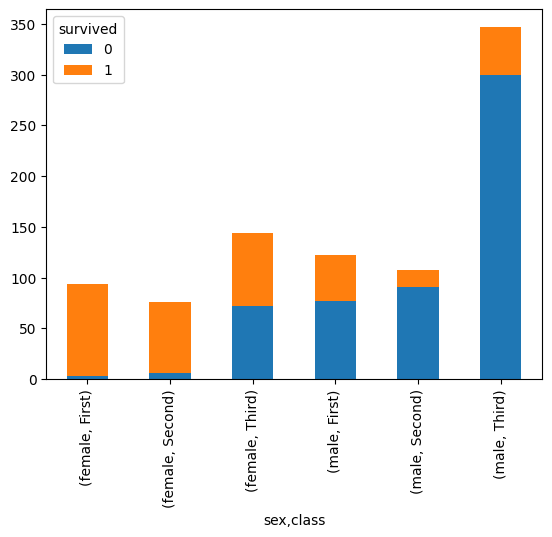

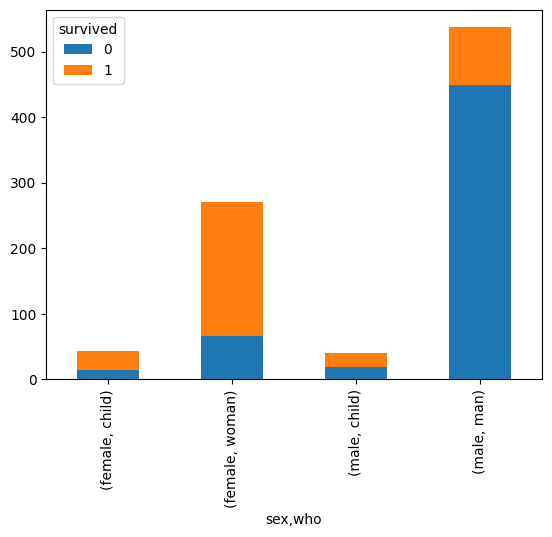

In [445]:
data = df.groupby(["sex", "class"])[target_column].value_counts()
data.unstack().plot(kind="bar", stacked=True)

data = df.groupby(["sex", "who"])[target_column].value_counts()
data.unstack().plot(kind="bar", stacked=True)

/tmp/ipython-input-3949108774.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(column)[target_column].value_counts()
/tmp/ipython-input-3949108774.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(column)[target_column].value_counts()


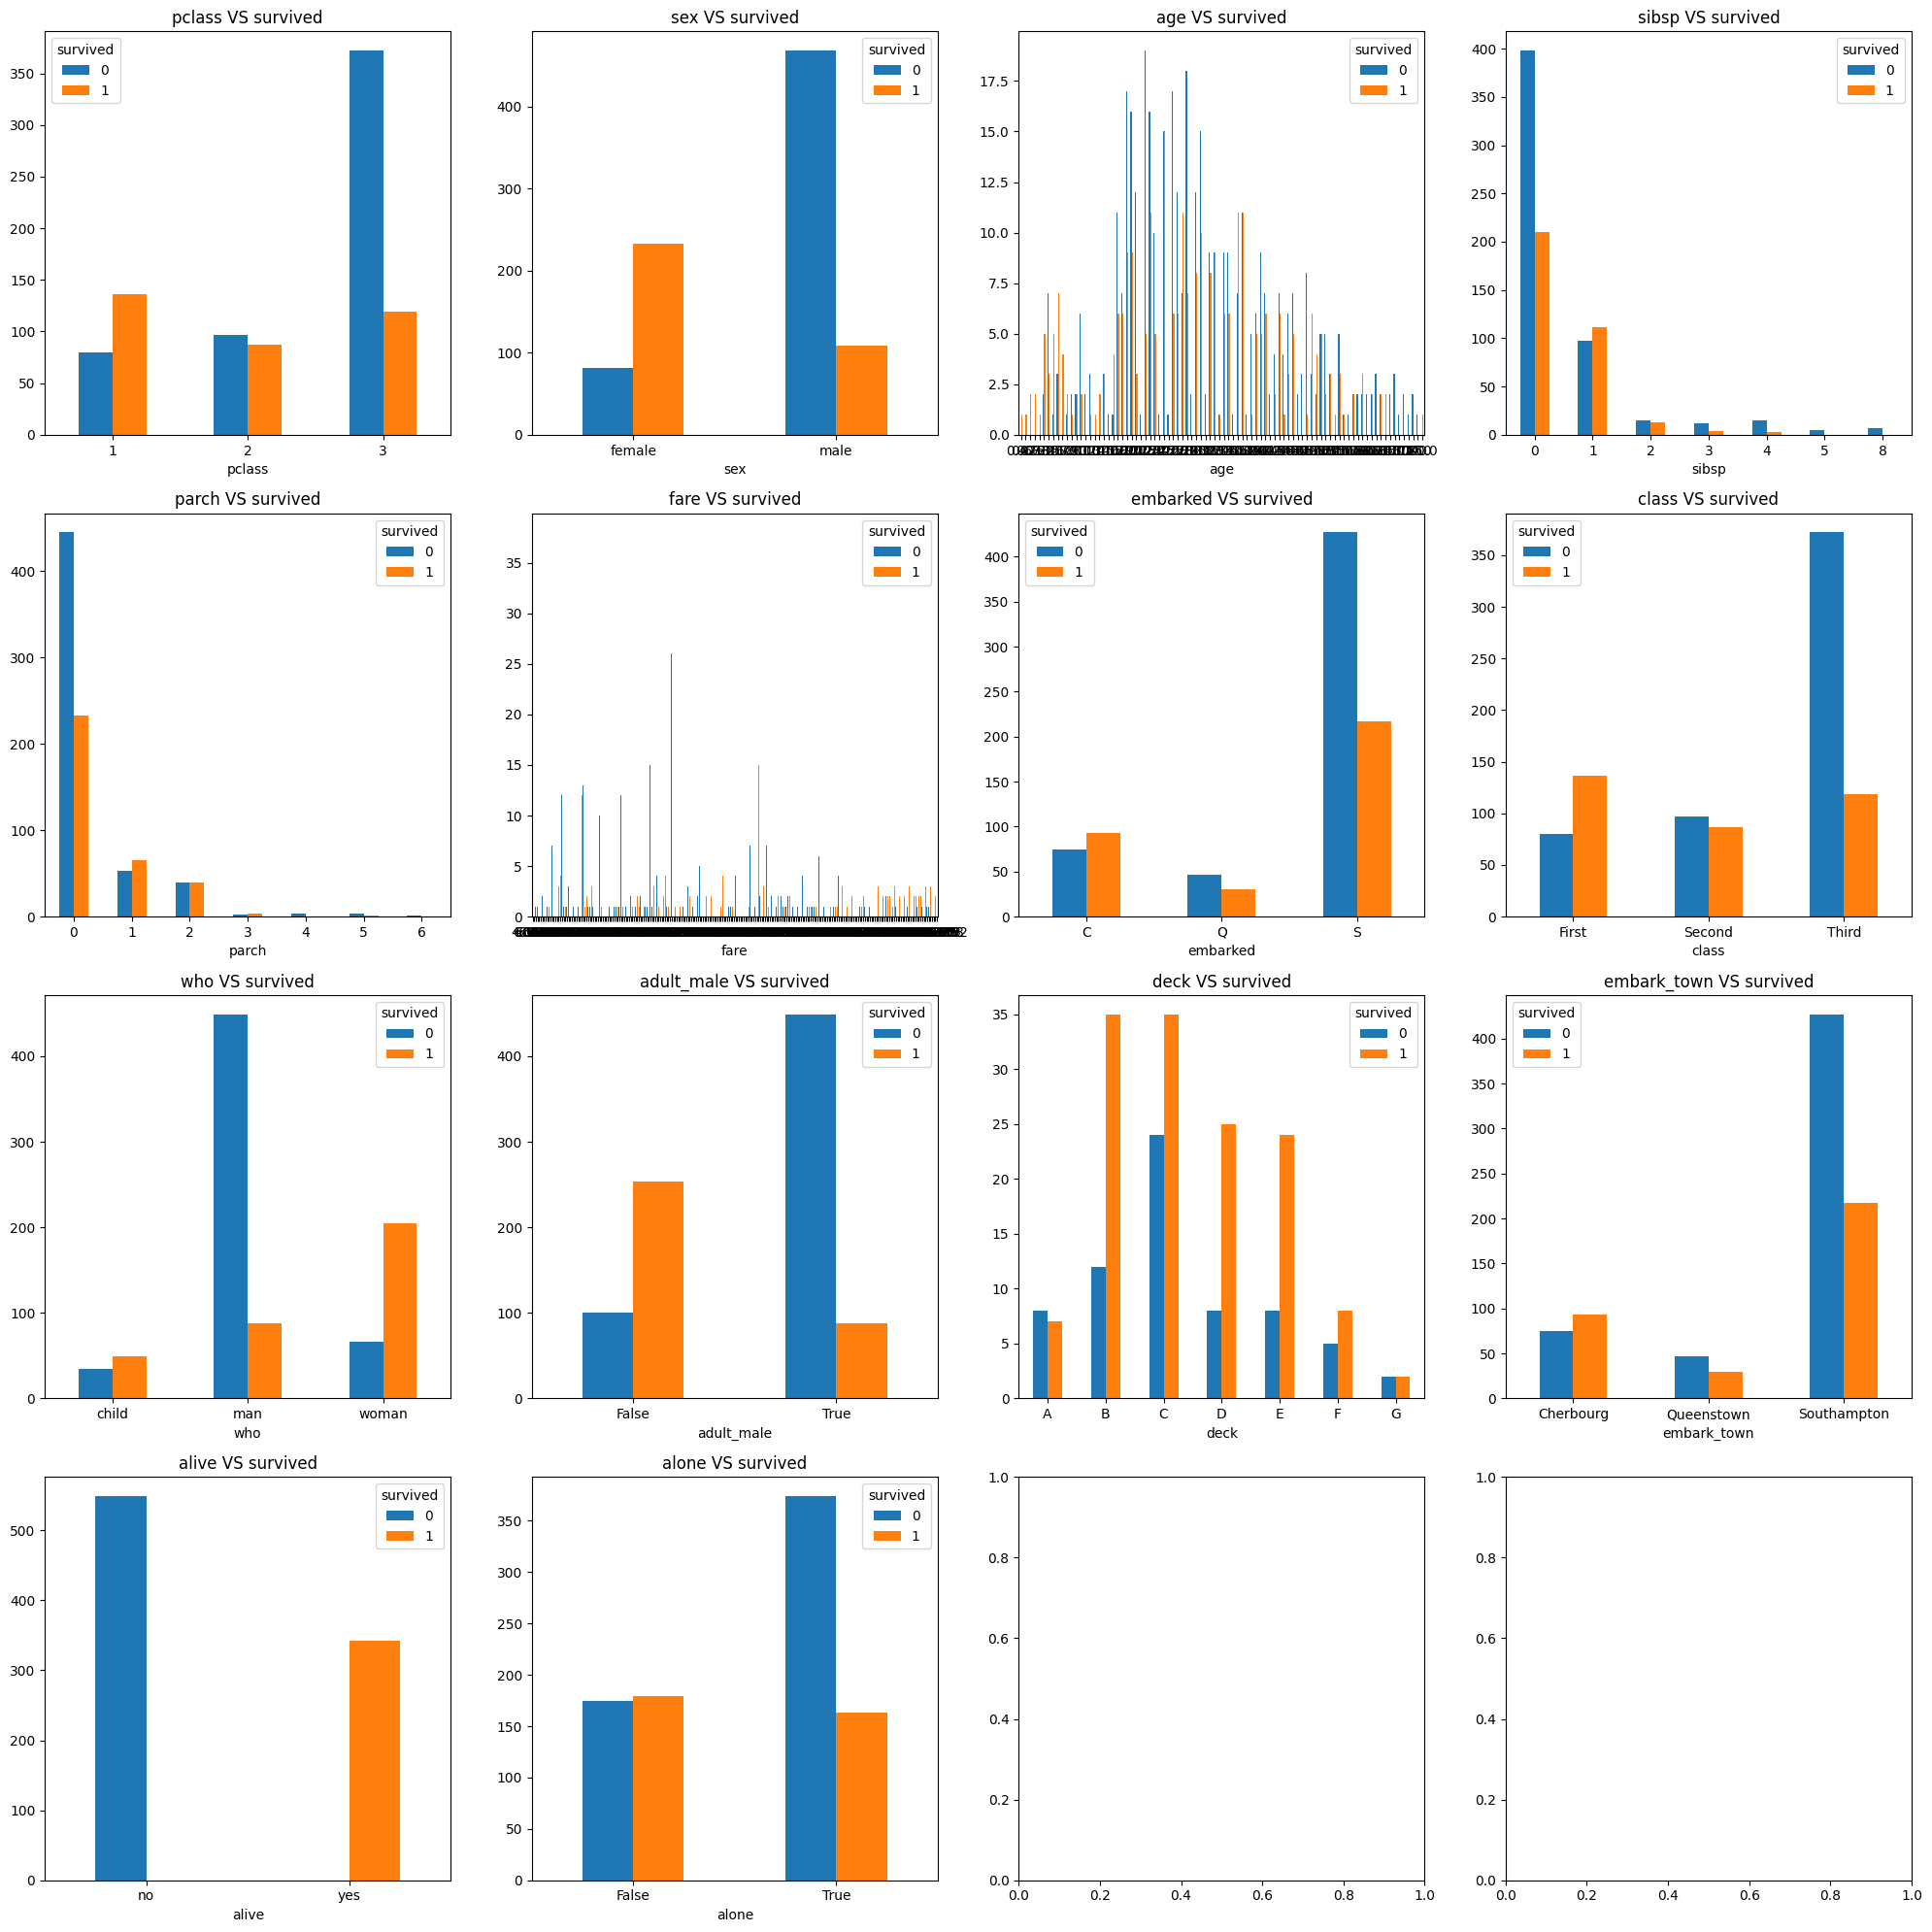

In [446]:
# Wszystkie wykresy pokazujące przeżywalność w zależności od innych zmiennych
feature_columns = df.columns.drop(target_column)
columns_count = len(feature_columns)
grid_cols_num = math.ceil(math.sqrt(columns_count))
grid_rows_num = math.ceil(columns_count / grid_cols_num)
fig, ax = plt.subplots(grid_rows_num, grid_cols_num, figsize=(grid_cols_num * 5, grid_rows_num * 5))

for i, column in enumerate(feature_columns):
    row = i // grid_cols_num
    col = i % grid_cols_num
    data = df.groupby(column)[target_column].value_counts()

    data.unstack().plot(kind="bar", stacked=False, ax=ax[row, col])
    ax[row, col].set_title(f"{column} VS {target_column}")
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Część 2: Przygotowanie danych

### 2.1 Usuń kolumny, które nie będą przydatne w modelowaniu (np. deck – za dużo braków).

In [447]:
columns_to_drop = [
    "deck", # za dużo braków
    "sex", # to samo co who ale bez "child"
    "fare", # zależne od class
    "embarked", # to samo co embark_town ale skrócone
    "class", # jest to samo co pclass ale kategoryczna
    "adult_male", # starczy who i age
    "alone", # zależne od sibsp i parch
    "alive" # to samo co survived ale kategoryczna
]
columns_to_drop_count = len(columns_to_drop)

print(f"---columns_to_drop ({columns_to_drop_count}):\n{columns_to_drop}")
df.drop(columns=columns_to_drop, inplace=True)

columns_left = df.columns
columns_left_count = len(columns_left)
print(f"\n---columns_left ({columns_left_count}):\n{columns_left}")

---columns_to_drop (8):
['deck', 'sex', 'fare', 'embarked', 'class', 'adult_male', 'alone', 'alive']

---columns_left (7):
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'who', 'embark_town'], dtype='object')


### 2.2 Uzupełnij brakujące wartości w kolumnie age (np. medianą).

In [448]:
df["age"] = df["age"].fillna(df["age"].mean())
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

### 2.3 Przekształć zmienne kategoryczne na numeryczne (one-hot encoding).

In [449]:
categorical_columns = df.select_dtypes(include=["category", "object", "bool"]).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(f"\n---categorical_columns:\n{categorical_columns}\n")
print(f"\n---info:\n{df_encoded.info()}")
print(f"\n---head:\n{df_encoded.head()}")


---categorical_columns:
Index(['who', 'embark_town'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   who_man                  891 non-null    bool   
 6   who_woman                891 non-null    bool   
 7   embark_town_Queenstown   891 non-null    bool   
 8   embark_town_Southampton  891 non-null    bool   
dtypes: bool(4), float64(1), int64(4)
memory usage: 38.4 KB

---info:
None

---head:
   survived  pclass   age  sibsp  parch  who_man  who_woman  embark_town_Queenstown  embark_town_Southampton
0         0       3  22.0      1    

### 2.4 Podziel dane na zbiór treningowy (80%) i testowy (20%) z zachowaniem proporcji klas (stratify).

In [450]:
y = df_encoded[target_column]
X = df_encoded.drop(columns=[target_column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Część 3: Budowa modelu

### 3.1 Wytrenuj model regresji logistycznej na zbiorze treningowym.

In [451]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 3.2 Wyświetl współczynniki modelu i zinterpretuj 3 najważniejsze zmienne.

In [452]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": coefficients
})

print(f"---intercept:\n{intercept}")
print(f"\n---coef_df:\n{coef_df.sort_values(by="coef", key=abs, ascending=False)}")

---intercept:
4.646621499505144

---coef_df:
                   feature      coef
4                  who_man -2.498275
0                   pclass -1.121896
5                who_woman  0.506245
7  embark_town_Southampton -0.451215
2                    sibsp -0.380321
3                    parch -0.161878
6   embark_town_Queenstown  0.093030
1                      age -0.027556


- **who_man**: Współczynnik wynosi -2.498. Oznacza, że bycie mężczyzną znacząco zmniejsza prawdopodobieństwo przeżycia w porównaniu do bycia kobietą lub dzieckiem

- **pclass**: Współczynnik wynosi -1.122. Oznacza, że wzrost wartości (obniżenie klasy) zmniejsza prawdopodobieństwo przeżycia. Czyli pasażerowie z niższej klasy mieli mniejsze szanse na przeżycie w porównaniu do pasażerów z wyższej klasy

- **who_woman**: Współczynnik wynosi 0.506. Oznacza, że bycie kobietą zwiększa prawdopodobieństwo przeżycia w porównaniu do bycia mężczyzną lub dzieckiem

### 3.3 Oblicz odds ratio dla każdej zmiennej i wyjaśnij, co oznacza dla zmiennej sex/who.

In [453]:
odds_df = pd.DataFrame({
    "feature": X.columns,
    "odds_ratio": np.exp(coefficients)
})

print(f"---odds_df:\n{odds_df.sort_values(by="odds_ratio", ascending=False)}")

---odds_df:
                   feature  odds_ratio
5                who_woman    1.659049
6   embark_town_Queenstown    1.097494
1                      age    0.972820
3                    parch    0.850545
2                    sibsp    0.683642
7  embark_town_Southampton    0.636854
0                   pclass    0.325662
4                  who_man    0.082227


- **who_woman**: Iloraz szans wynosi 1.659. Oznacza to, że kobiety mają ok 66% większe szanse przeżycia niż dzieci

- **who_man**: Iloraz szans wynosi 0.082. Oznacza to, że mężczyźni mają ok 92% mniejsze szanse przeżycia niż dzieci

- **who_child** (kategoria referencyjna). Nie ma własnego odds ratio - jej iloraz szans jest domyślnie równe 1, a pozostałe kategorie są do niej porównywane

## Część 4: Ewaluacja modelu

### 4.1 Dokonaj predykcji na zbiorze testowym.

In [454]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred,
    "y_pred_proba": y_pred_proba
})

print(f"---predictions_df:\n{predictions_df}")

---predictions_df:
     y_test  y_pred  y_pred_proba
565       0       0      0.043499
160       0       0      0.045524
553       1       0      0.139004
860       0       0      0.027679
241       1       1      0.664070
..      ...     ...           ...
880       1       1      0.833004
91        0       0      0.097997
883       0       0      0.211111
473       1       1      0.906809
637       0       0      0.125307

[179 rows x 3 columns]


### 4.2 Wyświetl i zwizualizuj macierz konfuzji.

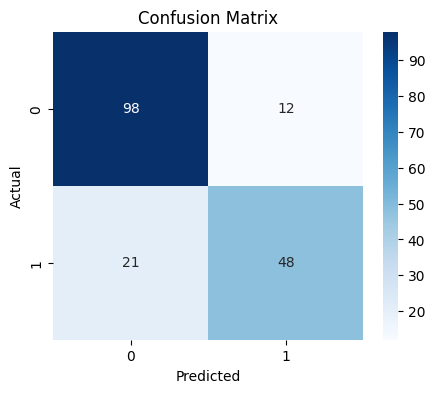

In [455]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 4.3 Oblicz następujące metryki i wyjaśnij, co każda z nich oznacza:
- Accuracy (dokładność)
- Precision (precyzja)
- Recall (czułość)
- F1-score
- Specificity (swoistość)

In [456]:
def calc_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel() # lub .flatten()

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy, precision, recall, f1, specificity

In [457]:
accuracy, precision, recall, f1, specificity = calc_metrics(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)

print("Manual | Function")
print(f"\n---accuracy:\n{accuracy:.3} | {accuracy2:.3} - jak często model ma rację")
print(f"\n---precision:\n{precision:.3} | {precision2:.3} - ile z przewidzianych „tak” było naprawdę „tak”")
print(f"\n---recall:\n{recall:.3} | {recall2:.3} - ile prawdziwych „tak” model wykrył")
print(f"\n---f1:\n{f1:.3} | {f12:.3} - kompromis między precision i recall")
print(f"\n---specificity:\n{specificity:.3} - ile prawdziwych „nie” model poprawnie rozpoznał")

Manual | Function

---accuracy:
0.816 | 0.816 - jak często model ma rację

---precision:
0.8 | 0.8 - ile z przewidzianych „tak” było naprawdę „tak”

---recall:
0.696 | 0.696 - ile prawdziwych „tak” model wykrył

---f1:
0.744 | 0.744 - kompromis między precision i recall

---specificity:
0.891 - ile prawdziwych „nie” model poprawnie rozpoznał


### 4.4 Narysuj krzywą ROC i oblicz AUC.

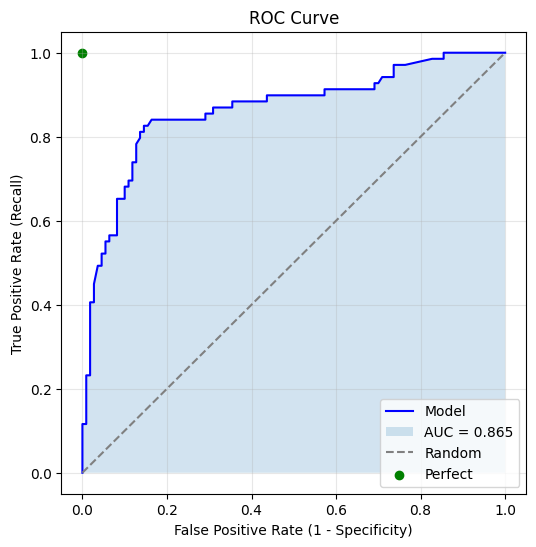

In [458]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="b", label="Model")
plt.fill_between(fpr, tpr, alpha=0.2, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray", label="Random")
plt.scatter(0, 1, color="g", label="Perfect")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.grid(alpha=0.3)
plt.legend(loc="lower right")
plt.show()

### 4.5 Odpowiedz: Która metryka jest najważniejsza w tym problemie i dlaczego?

Moim zdaniem metryki **F1** i **AUC** są najważniejsze, bo ważne jest dla nas by ani fałszywie nie "uśmiercić" nikogo ani fałszywie nie "ożywić" - zależy nam na ogólnej jakości. **Accuracy** może być mylące przez lekkie niezbalansowanie klas

## Część 5: Eksperymenty

### 5.1 Sprawdź, jak zmienia się Recall i Precision dla różnych progów klasyfikacji (0.3, 0.4, 0.5, 0.6, 0.7).

In [459]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
stats = []

for threshold in thresholds:
    new_y_pred = [1 if p >= threshold else 0 for p in y_pred_proba]

    new_accuracy, new_precision, new_recall, new_f1, new_specificity = calc_metrics(y_test, new_y_pred)
    new_auc = roc_auc_score(y_test, y_pred_proba)

    stats.append([threshold, new_accuracy, new_precision, new_recall, new_f1, new_specificity, new_auc])

stats_df = pd.DataFrame(stats, columns=["threshold", "accuracy", "precision", "recall", "f1", "specificity", "auc"])

print(f"---stats_df:\n{stats_df}")

---stats_df:
   threshold  accuracy  precision    recall        f1  specificity       auc
0        0.3  0.815642   0.725000  0.840580  0.778523     0.800000  0.864888
1        0.4  0.843575   0.780822  0.826087  0.802817     0.854545  0.864888
2        0.5  0.815642   0.800000  0.695652  0.744186     0.890909  0.864888
3        0.6  0.798883   0.823529  0.608696  0.700000     0.918182  0.864888
4        0.7  0.776536   0.871795  0.492754  0.629630     0.954545  0.864888


### 5.2 Wytrenuj model z class_weight="balanced" i porównaj wyniki z modelem bazowym.

In [460]:
model_balanced = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)
y_pred_proba_balanced = model_balanced.predict_proba(X_test)[:, 1]

accuracy_balanced, precision_balanced, recall_balanced, f1_balanced, specificity_balanced = calc_metrics(y_test, y_pred_balanced)
auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

stats_balanced = ["balanced", accuracy_balanced, precision_balanced, recall_balanced, f1_balanced, specificity, auc_balanced]
stats_base = ["base", accuracy, precision, recall, f1, specificity, auc]

stats_compare = pd.DataFrame([stats_base, stats_balanced], columns=["model", "accuracy", "precision", "recall", "f1", "specificity", "auc"])

print(f"---stats_compare:\n{stats_compare}")

---stats_compare:
      model  accuracy  precision    recall        f1  specificity       auc
0      base  0.815642   0.800000  0.695652  0.744186     0.890909  0.864888
1  balanced  0.843575   0.780822  0.826087  0.802817     0.890909  0.865415


Niewielkim kosztem precyzji zyskaliśmy polepszenie reszty metryk w zbalansowanym modelu względem modelu bazowego. Nowy model może przewidzieć znacznie więcej osób które faktycznie przeżyły (wyższy **Recall**), delikatnym kosztem fałszywych "ożywień" (niższy **Precision**). Dodatkowo wzrosły metryki ogólnej skuteczności modelu (mocno **Accuracy**, bardzo mocno **F1**, minimalnie **AUC**). **Specificity** pozostało bez zmian co nie jest złe, ale oznacza, że zbalansowany model przewidzi tyle samo śmierci co model bazowy.

## Część 6: Regularyzacja

### 6.1 Standaryzacja danych
Przed eksperymentami z regularyzacją wystandaryzuj zmienne numeryczne używając StandardScaler. Pamiętaj: dopasuj (fit) scaler tylko na zbiorze treningowym!

In [461]:
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

print(f"\n---numerical_columns:\n{numerical_columns}")
print(f"\n---describe:\n{X_train_scaled.describe()}")
print(f"\n---head:\n{X_train_scaled.head()}")


---numerical_columns:
Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')

---describe:
             pclass           age         sibsp         parch
count  7.120000e+02  7.120000e+02  7.120000e+02  7.120000e+02
mean  -1.821265e-16  3.892018e-16 -5.613487e-18 -1.621674e-17
std    1.000703e+00  1.000703e+00  1.000703e+00  1.000703e+00
min   -1.571457e+00 -2.257945e+00 -4.650843e-01 -4.661832e-01
25%   -3.709448e-01 -5.987089e-01 -4.650843e-01 -4.661832e-01
50%    8.295675e-01 -6.741426e-03 -4.650843e-01 -4.661832e-01
75%    8.295675e-01  4.777189e-01  4.783345e-01 -4.661832e-01
max    8.295675e-01  3.860778e+00  7.082266e+00  6.697610e+00

---head:
       pclass       age     sibsp     parch  who_man  who_woman  embark_town_Queenstown  embark_town_Southampton
692  0.829568 -0.006741 -0.465084 -0.466183     True      False                   False                     True
481 -0.370945 -0.006741 -0.465084 -0.466183     True      False                   False                     Tr

### 6.2 Wpływ parametru C
Wytrenuj modele z regularyzacją L2 dla różnych wartości C: 0.001, 0.01, 0.1, 1, 10, 100. Dla każdego modelu:
- Oblicz AUC na zbiorze testowym
- Oblicz sumę wartości bezwzględnych współczynników Σ|βj|
- Stwórz wykres pokazujący zależność AUC i sumy |β| od wartości C.

---stats_df:
         c  accuracy  precision    recall        f1  specificity       auc   Σ(|βj|)    Σ(βj^2)
0    0.001  0.614525   0.000000  0.000000  0.000000     1.000000  0.835639  0.351223   0.025547
1    0.010  0.765363   0.885714  0.449275  0.596154     0.963636  0.859486  1.923551   0.745520
2    0.100  0.798883   0.789474  0.652174  0.714286     0.890909  0.863307  4.346887   4.041114
3    1.000  0.815642   0.800000  0.695652  0.744186     0.890909  0.865152  5.387411   7.889581
4   10.000  0.821229   0.813559  0.695652  0.750000     0.900000  0.865415  5.558266   9.916799
5  100.000  0.821229   0.813559  0.695652  0.750000     0.900000  0.865152  5.581060  10.251535


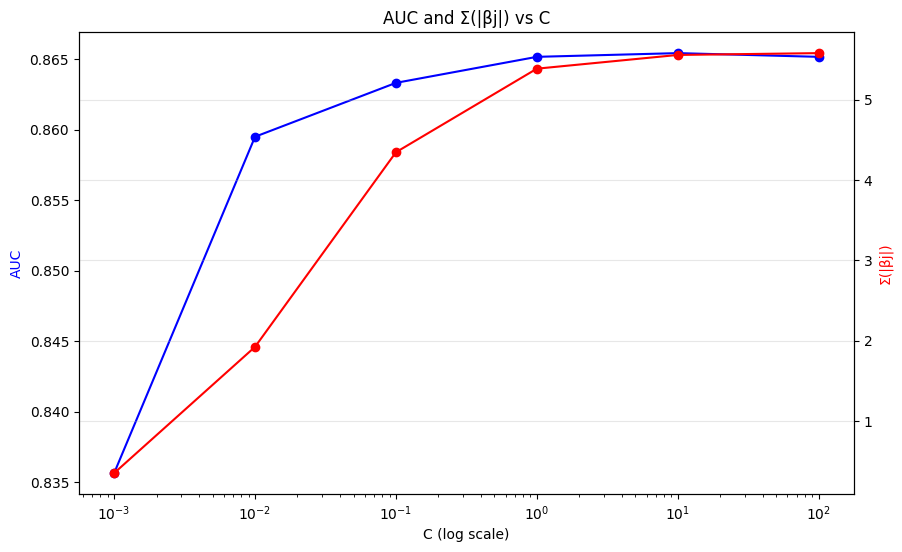

In [462]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
stats_c = []

for c in c_values:
    model_c = LogisticRegression(penalty="l2", C=c, max_iter=1000, random_state=42)
    model_c.fit(X_train_scaled, y_train)

    y_pred_c = model_c.predict(X_test_scaled)
    y_pred_proba_c = model_c.predict_proba(X_test_scaled)[:, 1]

    accuracy_c, precision_c, recall_c, f1_c, specificity_c = calc_metrics(y_test, y_pred_c)
    auc_c = roc_auc_score(y_test, y_pred_proba_c)

    abs_coef_sum_c = np.sum(np.abs(model_c.coef_))
    sq_coef_sum_c = np.sum(np.square(model_c.coef_))

    stats_c.append([c, accuracy_c, precision_c, recall_c, f1_c, specificity_c, auc_c, abs_coef_sum_c, sq_coef_sum_c])

stats_df = pd.DataFrame(stats_c, columns=["c", "accuracy", "precision", "recall", "f1", "specificity", "auc", "Σ(|βj|)", "Σ(βj^2)"])

print(f"---stats_df:\n{stats_df}")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xscale("log")
ax1.plot(stats_df["c"], stats_df["auc"], marker="o", linestyle="-", color="b", label="AUC")
ax1.set_xlabel("C (log scale)")
ax1.set_ylabel("AUC", color="b")

ax2 = ax1.twinx()
ax2.plot(stats_df["c"], stats_df["Σ(|βj|)"], marker="o", linestyle="-", color="r", label="Σ(|βj|)")
ax2.set_ylabel("Σ(|βj|)", color="r")

plt.title("AUC and Σ(|βj|) vs C")
plt.grid(alpha=0.3)
plt.show()

### 6.3 Porównanie L1 vs L2:
Wytrenuj dwa modele z C=0.1:
- Model z regularyzacją L2 (Ridge): penalty="l2"
- Model z regularyzacją L1 (Lasso): penalty="l1", solver="liblinear"
- Porównaj współczynniki obu modeli.

In [463]:
c = 0.1
model_l1 = LogisticRegression(penalty="l1", C=c, solver="liblinear", max_iter=1000, random_state=42)
model_l2 = LogisticRegression(penalty="l2", C=c, max_iter=1000, random_state=42)

model_l1.fit(X_train_scaled, y_train)
model_l2.fit(X_train_scaled, y_train)

intercept_l1 = model_l1.intercept_[0]
coefficients_l1 = model_l1.coef_[0]

intercept_l2 = model_l2.intercept_[0]
coefficients_l2 = model_l2.coef_[0]

coef_df_l1_l2 = pd.DataFrame({
    "feature": X.columns,
    "coef_l1": coefficients_l1,
    "coef_l2": coefficients_l2
})

print(f"---intercept_l1:\n{intercept_l1}")
print(f"\n---intercept_l2:\n{intercept_l2}")
print(f"\n---coef_df_l1_l2:\n{coef_df_l1_l2.sort_values(by="coef_l1", key=abs, ascending=False)}")

---intercept_l1:
0.0

---intercept_l2:
0.2621270415044075

---coef_df_l1_l2:
                   feature   coef_l1   coef_l2
4                  who_man -1.564705 -1.498590
5                who_woman  0.855803  0.886107
0                   pclass -0.775503 -0.805126
1                      age -0.287974 -0.383575
2                    sibsp -0.211159 -0.269761
3                    parch  0.000000 -0.044434
6   embark_town_Queenstown  0.000000  0.098157
7  embark_town_Southampton  0.000000 -0.361139
